In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

$I(\gamma)=1-\sum_{i=1}^{N}{a_i exp(-b_i \gamma)}$ 

多項式としてフィッティングする

$log(1-I(\gamma))=\sum_{i=1}^{N}{(-b_i \gamma +log(a_i))}$

In [ ]:
def func(X, *param):
    Y=1
    alpha=param[::2]
    beta=param[1::2]
    for alpha_i,beta_i in zip(alpha,beta):
        Y=Y-alpha_i*np.exp(-1*beta_i*X)
    return Y

In [101]:
#constant
M=256
EsNodB=0.0

In [102]:
# directory make
current_directory="/home/kaneko/Dropbox/programming/geometric_shaping/capacity_estimation"
#current_directory=os.getcwd()
dir_name="BMI"
dir_name=current_directory+"/"+dir_name
#filename
filename="{}QAM_{}".format(M,EsNodB)
filename=dir_name+"/"+filename

res=np.loadtxt(filename)

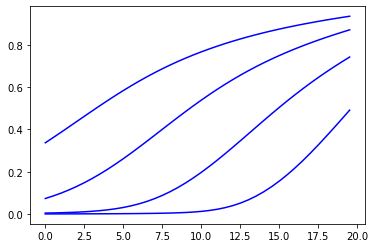

In [103]:
x = np.arange(0,20,0.5)
y = np.zeros((len(x),int(np.log2(M)/2)))
for i,SNR in enumerate(x):
    QAMname="{}QAM".format(M)
    filename=QAMname+"_{}".format(SNR)
    filename=dir_name+"/"+filename
    res=np.loadtxt(filename)
    #print(len(res))
    y[i]=res[:len(res)//2]



#change Y for fitting
#y=1-y
#y=np.log(y)


plt.plot(x, y, 'b-', label='data')

In [104]:
#save txt

with open(QAMname,'w') as f:

    print("#EsNodB,MI",file=f)  
    for i in range(len(x)):
        print(str(x[i]),str(y[i,0]),str(y[i,1]),str(y[i,2]),str(y[i,3]),file=f)


In [ ]:
import numpy as np
from scipy.optimize import differential_evolution

import matplotlib.pyplot as plt

def ExpFitDiffEvol(N, x, y):
    """
    Fits a multi-exponential decay by scipy.optimize.differential_evolution

    Parameters
    ----------
    N : integer
        number of exponentials.
    x : (n) array_like
        1-dimensional list of x-values.
    y : (n), array_like
        1-dimensional list of y-values.
    Returns
    -------
    a : (N) array
        solution prefactors in order a1, a2, ..., aN.
    b : (N) array
        solution exponents (positive) in order b1, b2, ..., bN.
    red_chi_sq : float
        reduced chi squared as calculated by the sum of squared residuals
    Notes
    -----
    .. versionadded:: 1.0.0
    No notes yet.
    """
    x = np.asarray(x)
    y = np.asarray(y)

    bounds = [[min(x), max(x)]]*N + [[min(y), max(y)]]*N

    def objective(s):
        taui, fi = np.split(s, 2)
        return np.sum((y - np.dot(fi, np.exp(-np.outer(1./taui, x))))**2.)

    result = differential_evolution(objective, bounds)
    print(result)
    s = result['x']
    red_chi_sq = objective(s)/(len(x)-len(s))
    taui, fi = np.split(s, 2)
    return fi, 1./taui, red_chi_sq


In [ ]:
def EvalExpFit(x, a, b):
    """
    Is used to evaluate multi-exponential function for parameter lists a, b

    Parameters
    ----------
    x : (n) array_like
        1-dimensional list of x-values.
    a : (N) array_like
        1-dimensional list of prefactors.
    b : (N) array_like
        1-dimensional list of exponents (positive).
    Returns
    -------
    y : (n) array
        y-values of the multi-exponential function corresponding to the x-values put in.
    Notes
    -----
    .. versionadded:: 1.0.0
    No notes yet.
    """
    return np.dot(a, np.exp(-np.outer(b, x)))


     fun: 0.05747651120526938
     jac: array([ 4.54636331e-06,  1.87350137e-06,  8.52998233e-06, -7.14706076e-08,
       -6.49896803e-06, -6.56696916e-06, -6.14508444e-06,  2.97634833e-04])
 message: 'Optimization terminated successfully.'
    nfev: 9753
     nit: 79
 success: True
       x: array([6.21330167e+00, 6.21017155e+00, 6.21830787e+00, 5.98759637e+00,
       1.11021238e-01, 5.16048424e-01, 8.48512551e-02, 2.58622585e-05])
[1.11021238e-01 5.16048424e-01 8.48512551e-02 2.58622585e-05]
[0.16094503 0.16102615 0.16081545 0.16701193]


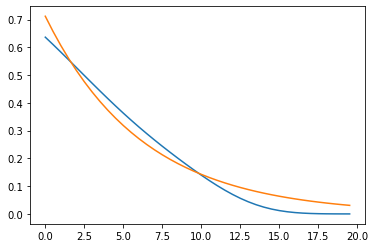

In [90]:
a,b,red_chi_sq=ExpFitDiffEvol(4,x,y)
print(a)
print(b)
yFit=EvalExpFit(x, a, b)  
plt.plot(x,y,label='fitting')
plt.plot(x, yFit,label='data')
plt.show()